In [3]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [15]:
food_df = pd.read_csv("D:\Sites\Klasifikasi-project-01\data\onlinefoods.csv")

## Info Dataset

dataset [Online Food Dataset](https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset/data) diambil dari kaggle.com

In [16]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


dataset terdiri dari 12 kolom dengan 388 row

dimana terdapat 3 kolom integer, 2 kolom float, dan 8 kolom string

In [73]:
food_df.count()

Age                           388
Gender                        388
Marital Status                388
Occupation                    388
Monthly Income                388
Educational Qualifications    388
Family size                   388
Pin code                      388
Output                        388
Feedback                      388
dtype: int64

In [17]:
food_df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


beberapa kolom akan dihapus, seperti kolim latitude, longitude, dan kolom Unnamed:12

In [18]:
food_df.drop(columns=['latitude'], inplace=True)
food_df.drop(columns=['longitude'], inplace=True)
food_df = food_df.drop(['Unnamed: 12'], axis=1)

In [19]:
food_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,560010,Yes,Positive


kolom-kolom yang memiliki data selain int atau float akan di ubah kedalam bentuk angka, hal ini dilakukan secara manuan dengan menggolongkan output ke dalam kelompok angka,

contoh:
- gender = "Male": 1, "Female": 0
- Martial status = 'Prefer not to say': 0, 'Single': 1, 'Married': 2
- Ocupation = "Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4
- Education = "Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5
- Income = "No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, "10001 to 25000": 25000, "Below Rs.10000": 10000
- Feedback = "Positive": 1, "Negative ": 0
- Output = "Yes": 1, "No": 0

In [20]:
food_df['Gender'] = food_df["Gender"].map({"Male": 1, "Female": 0})
food_df['Marital Status'] = food_df['Marital Status'].map({'Prefer not to say': 0, 'Single': 1, 'Married': 2})
food_df['Occupation'] = food_df['Occupation'].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
food_df["Educational Qualifications"] = food_df["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
food_df["Monthly Income"] = food_df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, "10001 to 25000": 25000, "Below Rs.10000": 10000})
food_df["Feedback"] = food_df["Feedback"].map({"Positive": 1, "Negative ": 0})
food_df['Output'] = food_df["Output"].map({"Yes": 1, "No": 0})

In [21]:
food_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,0,1,1,0,2,4,560001,1,1
1,24,0,1,1,10000,1,3,560009,1,1
2,22,1,1,1,10000,2,3,560017,1,0
3,22,0,1,1,0,1,6,560019,1,1
4,22,1,1,1,10000,2,4,560010,1,1


## Splitting Data 
dataset akan dibagi menjadi 2, yaitu data latih dan data uji

data latih = 310

data Uji = 78

In [23]:
from sklearn.model_selection import train_test_split

X=food_df[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Feedback'
      ]]
y = food_df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Data Latih",X_train.count())
print("Data Uji",X_test.count())

# Model Pertama 

- 3 Layer
- Layer 1 : FLC 32 node, Dropout 0.2, FCL 2 node
- Adam Optimizer
- ReLU Activation
- 250 epoch
- Sparse Categorical Cross Entropy loss

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2)
])

In [35]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [36]:
model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [38]:
history_1 = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=250)

Epoch 1/250
10/10 [==============================] - 2s 66ms/step - loss: 1962.4285 - accuracy: 0.2613 - val_loss: 1363.2588 - val_accuracy: 0.1538
Epoch 2/250
10/10 [==============================] - 0s 11ms/step - loss: 1611.9326 - accuracy: 0.2774 - val_loss: 1022.0350 - val_accuracy: 0.1538
Epoch 3/250
10/10 [==============================] - 0s 11ms/step - loss: 1124.1847 - accuracy: 0.3581 - val_loss: 700.2990 - val_accuracy: 0.7179
Epoch 4/250
10/10 [==============================] - 0s 10ms/step - loss: 785.6228 - accuracy: 0.5032 - val_loss: 381.9223 - val_accuracy: 0.7179
Epoch 5/250
10/10 [==============================] - 0s 12ms/step - loss: 505.6068 - accuracy: 0.6129 - val_loss: 136.8769 - val_accuracy: 0.7179
Epoch 6/250
10/10 [==============================] - 0s 18ms/step - loss: 389.4284 - accuracy: 0.6548 - val_loss: 15.1270 - val_accuracy: 0.8462
Epoch 7/250
10/10 [==============================] - 0s 19ms/step - loss: 365.8226 - accuracy: 0.6677 - val_loss: 41.366

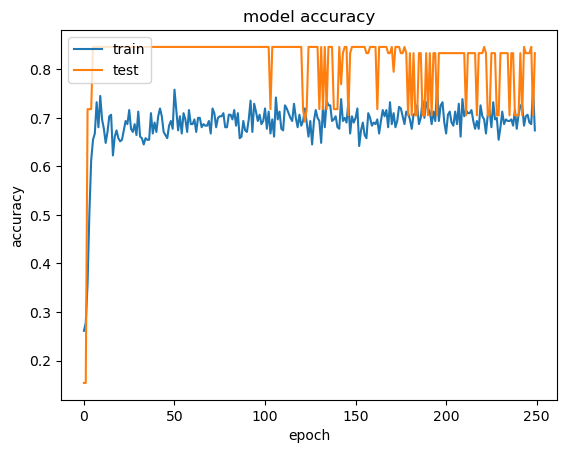

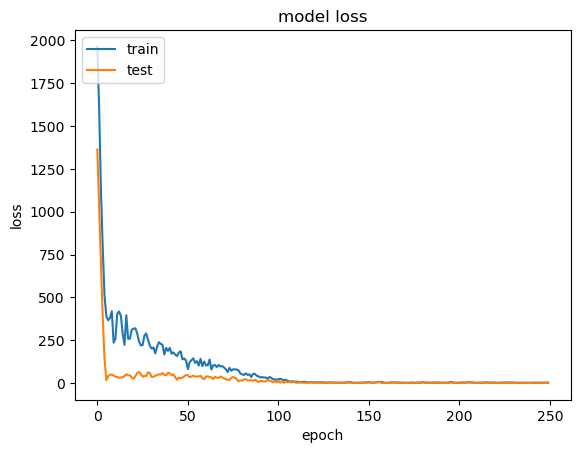

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [58]:
history = history_1

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


axes.legend()

# Model Kedua

- 3 Layer
- Layer 1 : FLC 32 node, FLC 16, FCL 2 node
- Adam Optimizer
- ReLU Activation
- 250 epoch
- Sparse Categorical Cross Entropy loss

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [41]:
model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [42]:


history_2 = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=250)

Epoch 1/250
10/10 [==============================] - 3s 66ms/step - loss: 122.2130 - accuracy: 0.4452 - val_loss: 49.4233 - val_accuracy: 0.2821
Epoch 2/250
10/10 [==============================] - 0s 18ms/step - loss: 27.3437 - accuracy: 0.4097 - val_loss: 22.9479 - val_accuracy: 0.2564
Epoch 3/250
10/10 [==============================] - 0s 18ms/step - loss: 15.6171 - accuracy: 0.5742 - val_loss: 12.0982 - val_accuracy: 0.8462
Epoch 4/250
10/10 [==============================] - 0s 17ms/step - loss: 8.0265 - accuracy: 0.6839 - val_loss: 1.0636 - val_accuracy: 0.8846
Epoch 5/250
10/10 [==============================] - 0s 18ms/step - loss: 3.2254 - accuracy: 0.6839 - val_loss: 4.9101 - val_accuracy: 0.8462
Epoch 6/250
10/10 [==============================] - 0s 17ms/step - loss: 5.9111 - accuracy: 0.6645 - val_loss: 2.7575 - val_accuracy: 0.8462
Epoch 7/250
10/10 [==============================] - 0s 35ms/step - loss: 3.4341 - accuracy: 0.6935 - val_loss: 1.2551 - val_accuracy: 0.8462

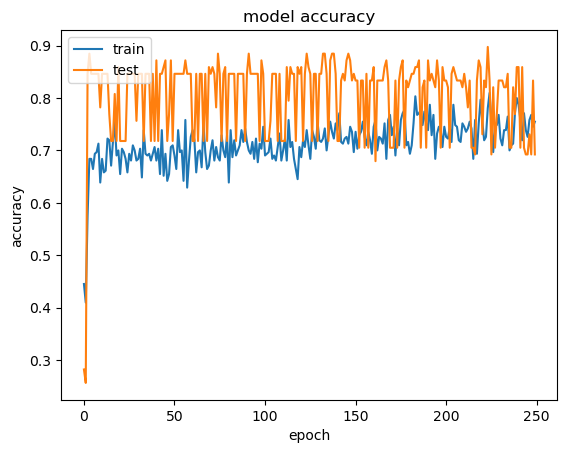

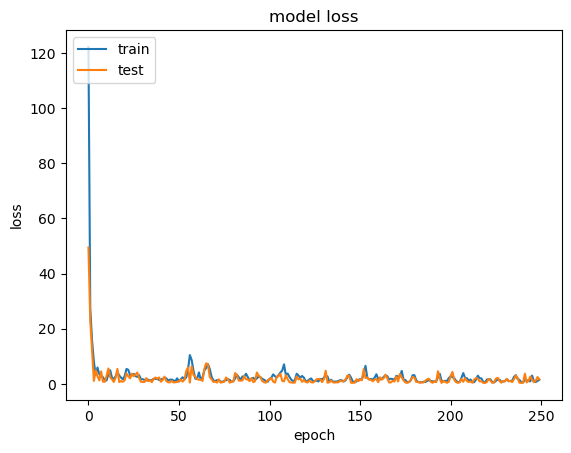

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [59]:
history = history_2

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


axes.legend()

# Model Keempat

- 4 Layer
- Layer 1 : FLC 32 node, FLC 16 node, FLC 8 node, FCL 2 node
- Adam Optimizer
- ReLU Activation
- 250 epoch
- Sparse Categorical Cross Entropy loss

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [61]:
history_3 = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=250)

Epoch 1/250
10/10 [==============================] - 3s 82ms/step - loss: 511.8910 - accuracy: 0.2613 - val_loss: 32.9186 - val_accuracy: 0.2821
Epoch 2/250
10/10 [==============================] - 0s 21ms/step - loss: 116.8948 - accuracy: 0.4452 - val_loss: 101.2088 - val_accuracy: 0.3846
Epoch 3/250
10/10 [==============================] - 0s 20ms/step - loss: 77.7418 - accuracy: 0.6194 - val_loss: 50.6649 - val_accuracy: 0.7179
Epoch 4/250
10/10 [==============================] - 0s 20ms/step - loss: 40.0794 - accuracy: 0.6323 - val_loss: 38.0387 - val_accuracy: 0.8462
Epoch 5/250
10/10 [==============================] - 0s 20ms/step - loss: 36.4390 - accuracy: 0.7516 - val_loss: 25.0893 - val_accuracy: 0.7179
Epoch 6/250
10/10 [==============================] - 0s 20ms/step - loss: 19.8988 - accuracy: 0.6871 - val_loss: 1.1215 - val_accuracy: 0.7692
Epoch 7/250
10/10 [==============================] - 0s 21ms/step - loss: 20.4269 - accuracy: 0.6903 - val_loss: 8.2654 - val_accuracy

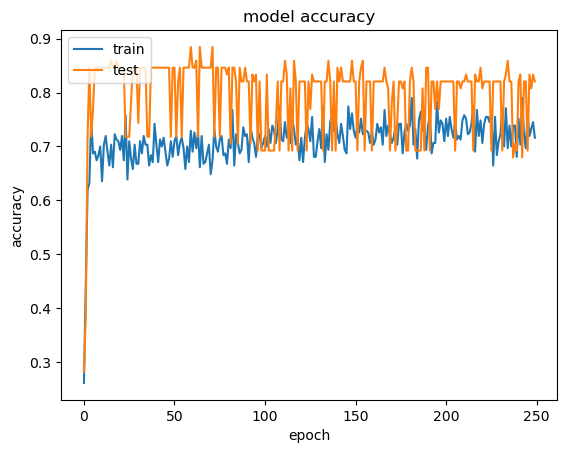

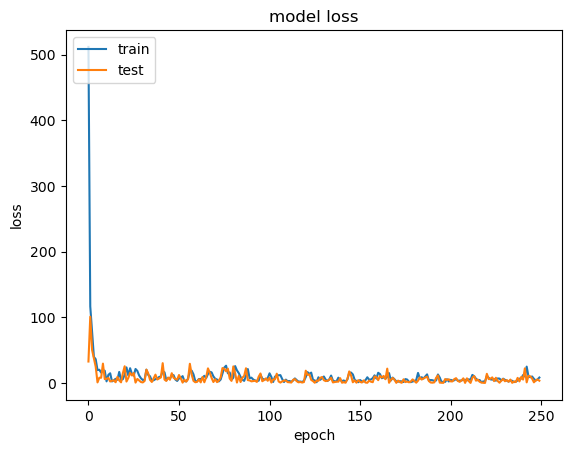

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [62]:
history = history_3

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


axes.legend()

# Model Pertama 

- 6 Layer
- Layer 1 : FLC 32 node, Dropout 0.8 FLC 16 node, Dropout 0.4, FLC 8 node,  FCL 2 node
- Adam Optimizer
- ReLU Activation
- 250 epoch
- Sparse Categorical Cross Entropy loss

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout( rate=0.8),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout( rate=0.4),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [67]:
history_4 = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=250)

Epoch 1/250
10/10 [==============================] - 3s 93ms/step - loss: 1112.2266 - accuracy: 0.4935 - val_loss: 507.0726 - val_accuracy: 0.7179
Epoch 2/250
10/10 [==============================] - 0s 20ms/step - loss: 912.7120 - accuracy: 0.5323 - val_loss: 369.8421 - val_accuracy: 0.7179
Epoch 3/250
10/10 [==============================] - 0s 21ms/step - loss: 794.6011 - accuracy: 0.5548 - val_loss: 246.5915 - val_accuracy: 0.7179
Epoch 4/250
10/10 [==============================] - 0s 21ms/step - loss: 601.3771 - accuracy: 0.5548 - val_loss: 179.7359 - val_accuracy: 0.7179
Epoch 5/250
10/10 [==============================] - 0s 23ms/step - loss: 519.4952 - accuracy: 0.5419 - val_loss: 121.9746 - val_accuracy: 0.7179
Epoch 6/250
10/10 [==============================] - 0s 21ms/step - loss: 511.5148 - accuracy: 0.6032 - val_loss: 76.2121 - val_accuracy: 0.7179
Epoch 7/250
10/10 [==============================] - 1s 86ms/step - loss: 396.7652 - accuracy: 0.6516 - val_loss: 80.1863 - 

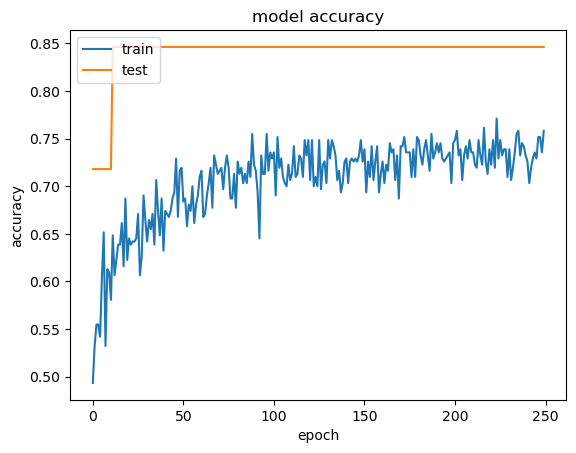

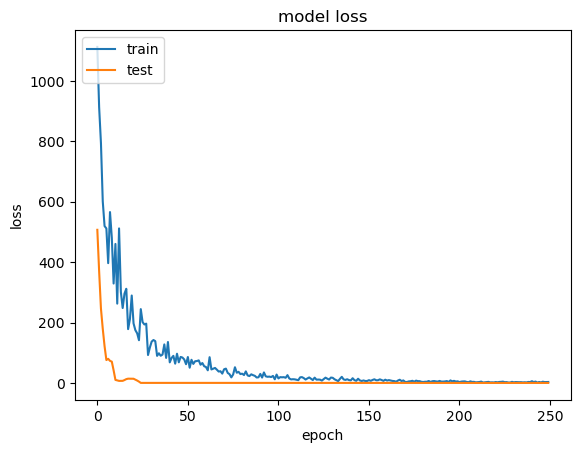

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [68]:
history = history_4

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


axes.legend()

## AKURASI MAX DARI SEMUA MODEL PERCOBAAN

In [72]:
print("Hasil Percobaan : ")
print("Akurasi Max Model 1 =", max(history_1.history["val_accuracy"]))
print("Akurasi Max Model 2 =", max(history_2.history["val_accuracy"]))
print("Akurasi Max Model 3 =", max(history_3.history["val_accuracy"]))
print("Akurasi Max Model 4 =", max(history_4.history["val_accuracy"]))

Hasil Percobaan : 
Akurasi Max Model 1 = 0.8461538553237915
Akurasi Max Model 2 = 0.8974359035491943
Akurasi Max Model 3 = 0.8846153616905212
Akurasi Max Model 4 = 0.8461538553237915
